## Phase 3- SQL operations

In [1]:
import sqlite3
import csv

In [2]:
db=sqlite3.connect("crime_database")

In [3]:
cursor=db.cursor()

In [5]:
cursor.execute("CREATE TABLE crime_against_women (state UT TEXT,DISTRICT TEXT,Year INT,Rape INT,Kindanpping INT,Dowry Deaths INT,Assault INT,Insult  INT,Cruelty by Husband  INT,Importation of Girls INT) ")
db.commit()

### 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table

In [ ]:
with open('42_District_wise_crimes_committed_against_women_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crimes_against_women VALUES(?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1
    


In [14]:

print(no_records,'Records Inserted')

9017 Records Inserted


### 3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year



In [119]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kindanpping) FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC")
for row in result:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


__The state, district and year  with district with Highest Rape and Kidnapping i.e MURSHIDABAD District in WEST BENGAL in year 2011 with 568 rape and 492 Kidnapping cases__

### 3.3 Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year

In [122]:
result=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MIN(Rape), MIN(Kindanpping) FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY UT ORDER BY Kindanpping")
for row in result:
    print(row)


('A & N ISLANDS', 'NICOBAR', 2001, 0, 0)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2001, 0, 0)
('ARUNACHAL PRADESH', 'TAWANG', 2001, 0, 0)
('ASSAM', 'C.I.D.', 2001, 0, 0)
('BIHAR', 'ARWAL', 2001, 0, 0)
('CHHATTISGARH', 'BIZAPUR', 2001, 0, 0)
('DAMAN & DIU', 'DIU', 2001, 0, 0)
('DELHI', 'S.T.F.', 2001, 0, 0)
('GUJARAT', 'W.RLY', 2001, 0, 0)
('HARYANA', 'GRP', 2002, 0, 0)
('HIMACHAL PRADESH', 'G.R.P.', 2001, 0, 0)
('JAMMU & KASHMIR', 'CRIME JAMMU', 2001, 0, 0)
('JHARKHAND', 'DEOGHAR', 2001, 0, 0)
('KARNATAKA', 'CHITRADURGA', 2001, 0, 0)
('KERALA', 'CBCID', 2001, 0, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0, 0)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 0, 0)
('MAHARASHTRA', 'MUMBAI RLY.', 2001, 0, 0)
('MANIPUR', 'CHURACHANDPUR', 2001, 0, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0, 0)
('MIZORAM', 'AIZAWL', 2001, 0, 0)
('NAGALAND', 'KIPHIRE', 2001, 0, 0)
('ODISHA', 'RAYAGADA', 2001, 0, 0)
('PUDUCHERRY', 'KARAIKAL', 2011, 0, 0)
('PUNJAB', 'G.R.P', 2001, 0, 0)
('RAJASTHAN', 'G.R.P.', 2003, 0, 0)
('S

__All the above result showing Minimum of Rape And KIdnapping in each state And year.__

### 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table

In [ ]:
cursor.execute("CREATE TABLE crime_against_st (state UT TEXT,DISTRICT TEXT,Year INT,Murder INT,Rape INT,Kidanpping INT,Dacoity INT,Robbery INT,Arson  INT,Hurt INT,PCR INT,POA INT,Other Crimes INT) ")
db.commit()

In [14]:
with open('02_District_wise_crimes_committed_against_ST_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_against_st VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [15]:

print(no_records,'Records Inserted')

9018 Records Inserted


### 3.5 Write SQL query to find the highest number of dacoity/robbery in which district.

In [21]:
result=cursor.execute("SELECT State UT,DISTRICT ,Year, MAX(Dacoity), MAX(Robbery) FROM crime_against_st WHERE NOT DISTRICT ='TOTAL'  ")
for row in result:
    print(row)

('GUJARAT', 'DAHOD', 2001, 29, 32)


__Dahod District of Gujarat has highest number of Daocity and Robbery in Year 2001__

### 3.6	Write SQL query to find in which districts(All) the lowest number of murders happened

In [130]:
result=cursor.execute("SELECT State UT,DISTRICT, Murder FROM crime_against_st WHERE Murder=(SELECT MIN(Murder) FROM crime_against_st) GROUP BY state ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 0)
('ANDHRA PRADESH', 'ADILABAD', 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 0)
('ASSAM', 'BARPETA', 0)
('BIHAR', 'ARWAL', 0)
('CHANDIGARH', 'CHANDIGARH', 0)
('CHHATTISGARH', 'BALRAMPUR', 0)
('D & N HAVELI', 'D and N HAVELI', 0)
('DAMAN & DIU', 'DAMAN', 0)
('DELHI', 'CENTRAL', 0)
('GOA', 'NORTH GOA', 0)
('GUJARAT', 'AHMEDABAD COMMR.', 0)
('HARYANA', 'AMBALA', 0)
('HIMACHAL PRADESH', 'BILASPUR', 0)
('JAMMU & KASHMIR', 'ANANTNAG', 0)
('JHARKHAND', 'BOKARO', 0)
('KARNATAKA', 'BAGALKOT', 0)
('KERALA', 'ALAPUZHA', 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 0)
('MADHYA PRADESH', 'BETUL', 0)
('MAHARASHTRA', 'AKOLA', 0)
('MANIPUR', 'BISHNUPUR', 0)
('MEGHALAYA', 'GARO HILLS EAST', 0)
('MIZORAM', 'AIZAWL', 0)
('NAGALAND', 'DIMAPUR', 0)
('ODISHA', 'ANGUL', 0)
('PUDUCHERRY', 'PONDICHERRY', 0)
('PUNJAB', 'AMRITSAR', 0)
('RAJASTHAN', 'AJMER', 0)
('SIKKIM', 'NORTH', 0)
('TAMIL NADU', 'ARIYALUR', 0)
('TRIPURA', 'DHALAI', 0)
('UTTAR PRADESH', 'AGRA', 0)
('UTTARAKHAND', 'ALMORA', 0)
('WES

__The Above result of query shows the minimum number of Murdrs happened in eah Ditsrict__

### 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise.

In [134]:
result=cursor.execute("SELECT  state, DISTRICT, Year,Murder FROM crime_against_st GROUP BY state ORDER BY Murder  ")
for row in result:
    print(row)

('A & N ISLANDS', 'ANDAMAN', 2001, 0)
('ANDHRA PRADESH', 'ADILABAD', 2001, 0)
('ARUNACHAL PRADESH', 'CHANGLANG', 2001, 0)
('ASSAM', 'BARPETA', 2001, 0)
('CHANDIGARH', 'CHANDIGARH', 2001, 0)
('CHHATTISGARH', 'BALRAMPUR', 2001, 0)
('D & N HAVELI', 'D and N HAVELI', 2001, 0)
('DAMAN & DIU', 'DAMAN', 2001, 0)
('DELHI', 'CENTRAL', 2001, 0)
('GOA', 'NORTH GOA', 2001, 0)
('GUJARAT', 'AHMEDABAD COMMR.', 2001, 0)
('HARYANA', 'AMBALA', 2001, 0)
('HIMACHAL PRADESH', 'BILASPUR', 2001, 0)
('JAMMU & KASHMIR', 'ANANTNAG', 2001, 0)
('JHARKHAND', 'BOKARO', 2001, 0)
('KARNATAKA', 'BAGALKOT', 2001, 0)
('KERALA', 'ALAPUZHA', 2001, 0)
('LAKSHADWEEP', 'LAKSHADWEEP', 2001, 0)
('MANIPUR', 'BISHNUPUR', 2001, 0)
('MEGHALAYA', 'GARO HILLS EAST', 2001, 0)
('MIZORAM', 'AIZAWL', 2001, 0)
('NAGALAND', 'DIMAPUR', 2001, 0)
('ODISHA', 'ANGUL', 2001, 0)
('PUDUCHERRY', 'PONDICHERRY', 2001, 0)
('PUNJAB', 'AMRITSAR', 2001, 0)
('RAJASTHAN', 'AJMER', 2001, 0)
('TAMIL NADU', 'ARIYALUR', 2001, 0)
('TRIPURA', 'DHALAI', 2001, 0)

__District ,Year and Murders in Ascending orders__

### 3.8.1Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table

In [18]:
import pandas as pd


In [78]:
cursor.execute ("CREATE TABLE crime_ipc(STATE UT TEXT,DISTRICT TEXT,YEAR INT, MURDER INT,ATTEMPT_to_MURDER INT,RAPE INT) ")

In [79]:

db.commit()

In [80]:
with open('01_District_wise_crimes_committed_IPC_2001_2012.csv','r') as file :
    #here r is read as
    no_records=0
    for row in file:
        cursor.execute("INSERT INTO crime_ipc VALUES(?,?,?,?,?,?)",row.split(","))#it will split the data row.split
        db.commit()
        no_records += 1

In [81]:
print(no_records,'Records Inserted')

9017 Records Inserted


### 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.

In [101]:
result=cursor.execute("SELECT State UT,DISTRICT, YEAR, MAX(MURDER) FROM crime_ipc GROUP BY DISTRICT ORDER BY UT ")
for row in result:
    print(row)

('A & N ISLANDS', 'A and N ISLANDS', 2007, 15)
('A & N ISLANDS', 'ANDAMAN', 2003, 16)
('A & N ISLANDS', 'CAR', 2012, 2)
('A & N ISLANDS', 'NICOBAR', 2003, 5)
('ANDHRA PRADESH', 'ADILABAD', 2004, 113)
('ANDHRA PRADESH', 'ANANTAPUR', 2006, 184)
('ANDHRA PRADESH', 'CHITTOOR', 2007, 129)
('ANDHRA PRADESH', 'CUDDAPAH', 2011, 120)
('ANDHRA PRADESH', 'CYBERABAD', 2011, 213)
('ANDHRA PRADESH', 'EAST GODAVARI', 2005, 110)
('ANDHRA PRADESH', 'GUNTAKAL RLY.', 2005, 12)
('ANDHRA PRADESH', 'GUNTUR', 2003, 210)
('ANDHRA PRADESH', 'GUNTUR URBAN', 2012, 56)
('ANDHRA PRADESH', 'HYDERABAD CITY', 2009, 153)
('ANDHRA PRADESH', 'KARIMNAGAR', 2005, 164)
('ANDHRA PRADESH', 'KHAMMAM', 2006, 134)
('ANDHRA PRADESH', 'KRISHNA', 2002, 92)
('ANDHRA PRADESH', 'KURNOOL', 2010, 156)
('ANDHRA PRADESH', 'MAHABOOBNAGAR', 2005, 212)
('ANDHRA PRADESH', 'MEDAK', 2011, 141)
('ANDHRA PRADESH', 'NALGONDA', 2003, 142)
('ANDHRA PRADESH', 'NELLORE', 2004, 94)
('ANDHRA PRADESH', 'NIZAMABAD', 2008, 153)
('ANDHRA PRADESH', 'PRAKASH

('MADHYA PRADESH', 'HARDA', 2010, 25)
('MADHYA PRADESH', 'HOSHANGABAD', 2011, 59)
('MADHYA PRADESH', 'INDORE', 2011, 135)
('MADHYA PRADESH', 'INDORE RLY.', 2001, 6)
('MADHYA PRADESH', 'JABALPUR', 2001, 103)
('MADHYA PRADESH', 'JABALPUR RLY.', 2012, 6)
('MADHYA PRADESH', 'JHABUA', 2004, 139)
('MADHYA PRADESH', 'KATNI', 2001, 51)
('MADHYA PRADESH', 'KHANDWA', 2001, 41)
('MADHYA PRADESH', 'KHARGON', 2012, 51)
('MADHYA PRADESH', 'MANDLA', 2005, 44)
('MADHYA PRADESH', 'MANDSAUR', 2008, 45)
('MADHYA PRADESH', 'MORENA', 2004, 66)
('MADHYA PRADESH', 'NARSINGHPUR', 2002, 48)
('MADHYA PRADESH', 'NEEMUCH', 2008, 24)
('MADHYA PRADESH', 'PANNA', 2004, 41)
('MADHYA PRADESH', 'RAISEN', 2009, 55)
('MADHYA PRADESH', 'RAJGARH', 2011, 43)
('MADHYA PRADESH', 'RATLAM', 2001, 58)
('MADHYA PRADESH', 'REWA', 2002, 68)
('MADHYA PRADESH', 'SAGAR', 2011, 94)
('MADHYA PRADESH', 'SATNA', 2007, 90)
('MADHYA PRADESH', 'SEONI', 2008, 41)
('MADHYA PRADESH', 'SHAHDOL', 2003, 60)
('MADHYA PRADESH', 'SHAJAPUR', 2011, 49)

In [102]:
#converting into dataframe
data=pd.read_sql("SELECT State UT, DISTRICT, YEAR, MAX(MURDER) AS MURDER FROM crime_ipc GROUP BY DISTRICT ORDER BY UT",db)

In [103]:
data

,UT,DISTRICT,YEAR,MURDER
0,A & N ISLANDS,A and N ISLANDS,2007,15
1,A & N ISLANDS,ANDAMAN,2003,16
2,A & N ISLANDS,CAR,2012,2
3,A & N ISLANDS,NICOBAR,2003,5
4,ANDHRA PRADESH,ADILABAD,2004,113
...,...,...,...,...
803,WEST BENGAL,PURULIA,2010,115
804,WEST BENGAL,SEALDAH G.R.P.,2001,23
805,WEST BENGAL,SILIGURI G.R.P.,2010,7
806,WEST BENGAL,SILIGURI_PC,2012,32



### 3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [31]:
#.3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year
data=cursor.execute("SELECT  state UT, DISTRICT ,Year ,MAX(Rape), MAX(Kindanpping) FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC")
for row in data:
    print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011, 433, 492)
('WEST BENGAL', 'MURSHIDABAD', 2012, 257, 464)
('WEST BENGAL', 'MURSHIDABAD', 2010, 526, 441)
('DELHI', 'NORTH-WEST', 2005, 236, 349)
('WEST BENGAL', 'MURSHIDABAD', 2009, 568, 342)
('UTTAR PRADESH', 'LUCKNOW', 2008, 334, 331)
('DELHI', 'NORTH WEST', 2001, 145, 298)
('DELHI', 'NORTH-WEST', 2006, 224, 287)
('DELHI', 'NORTH WEST', 2002, 159, 259)
('DELHI', 'OUTER', 2007, 369, 237)
('ASSAM', 'GUWAHATI CITY', 2004, 197, 228)
('DELHI', 'NORTH WEST', 2003, 137, 191)


### Converting into DataFrame

In [80]:

dataframe=pd.read_sql("SELECT  state UT, DISTRICT ,Year ,MAX(Rape) AS Rape, MAX(Kindanpping) AS Kidnapping FROM crimes_against_women WHERE NOT DISTRICT='TOTAL' AND NOT DISTRICT='DELHI UT TOTAL' GROUP BY Year ORDER BY Kindanpping DESC",db)

In [81]:
dataframe

,UT,DISTRICT,Year,Rape,Kidnapping
0,WEST BENGAL,MURSHIDABAD,2011,433,492
1,WEST BENGAL,MURSHIDABAD,2012,257,464
2,WEST BENGAL,MURSHIDABAD,2010,526,441
3,DELHI,NORTH-WEST,2005,236,349
4,WEST BENGAL,MURSHIDABAD,2009,568,342
5,UTTAR PRADESH,LUCKNOW,2008,334,331
6,DELHI,NORTH WEST,2001,145,298
7,DELHI,NORTH-WEST,2006,224,287
8,DELHI,NORTH WEST,2002,159,259
9,DELHI,OUTER,2007,369,237


In [82]:
dataframe['DISTRICT'].value_counts()

MURSHIDABAD      4
NORTH WEST       3
NORTH-WEST       2
LUCKNOW          1
OUTER            1
GUWAHATI CITY    1
Name: DISTRICT, dtype: int64

__From above We can Clearly see that Murshidabad is the state which appreared more than three years.__

In [36]:
from sqlalchemy import create_engine

In [37]:
engine = create_engine("sqlite+pysqlite:///:memory:")

In [38]:
dataframe.to_sql('district_data', engine)

12

In [40]:
from sqlalchemy import text

### Analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order.

In [100]:
with engine.connect() as conn:
    result = conn.execute(text("select UT, DISTRICT ,Year FROM district_data ORDER BY UT DESC LIMIT 3"))
    for row in result:
        print(row)

('WEST BENGAL', 'MURSHIDABAD', 2011)
('WEST BENGAL', 'MURSHIDABAD', 2012)
('WEST BENGAL', 'MURSHIDABAD', 2010)


__From Above result West Bengal, Murshidabas is the District which appeared more than 3 times  year wise__

##  3.8.4 Use appropriate graphs to show your data (the result of 3.8.3)

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

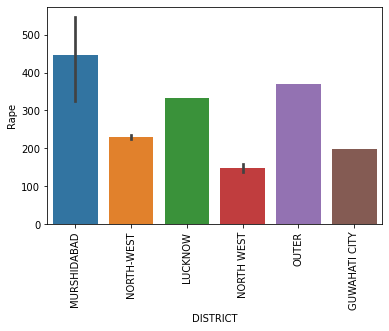

In [114]:

plt.figure(figsize=(6,4))
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Rape'])
plt.xticks(rotation='90')
plt.show()

__From Above BarPlot its clear that  Murshidabas is the Ditsrict of West Bengal which has highest cases of Rape and Guwahati City District of Assam has lowest cases of Rape as per the dataframe

### Anlaysis of  District vs Kidnapping

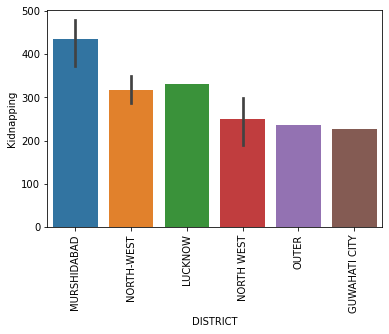

In [115]:
plt.figure(figsize=(6,4))
sns.barplot(x=dataframe['DISTRICT'], y=dataframe['Kidnapping'])
plt.xticks(rotation='90')
plt.show()

__Again Murshidabad District of West Bengal has highest cases of Kidnapping and Guwahati City Ditrict Assam has Lowest Kidnapping cases as per the resulted Dataframe__